## Template for tranining notebooks run using colab (no vscode)

In [1]:
GIT_BRANCH = 'dvae_plan'
REPO_PATH = '/content/learning_from_play'

In [2]:
!pip install -q wandb

     |████████████████████████████████| 2.0MB 6.4MB/s 
     |████████████████████████████████| 133kB 26.0MB/s 
     |████████████████████████████████| 102kB 9.5MB/s 
     |████████████████████████████████| 163kB 30.5MB/s 
     |████████████████████████████████| 71kB 8.0MB/s 


In [3]:
import wandb
wandb.login()

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [15]:
%load_ext autoreload
%autoreload 2

In [4]:
!git clone --branch $GIT_BRANCH 'https://github.com/sholtodouglas/learning_from_play' $REPO_PATH

import os
os.chdir(REPO_PATH)

Cloning into '/content/learning_from_play'...
remote: Enumerating objects: 152, done.
remote: Counting objects: 100% (152/152), done.
remote: Compressing objects: 100% (117/117), done.
remote: Total 2632 (delta 96), reused 70 (delta 35), pack-reused 2480
Receiving objects: 100% (2632/2632), 124.65 MiB | 21.97 MiB/s, done.
Resolving deltas: 100% (1574/1574), done.


In [19]:
!git pull

remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (1/1), done.
remote: Total 3 (delta 2), reused 3 (delta 2), pack-reused 0
Unpacking objects: 100% (3/3), done.
From https://github.com/sholtodouglas/learning_from_play
   b5b7c77..939da5f  dvae_plan  -> origin/dvae_plan
Updating b5b7c77..939da5f
Fast-forward
 preparer.py | 2 +-
 1 file changed, 1 insertion(+), 1 deletion(-)


In [5]:
from preparer import *

No pybullet installation found - which is fine if training


In [6]:
prep = Preparer()

In [7]:
prep.args = PrepArgs('''
fit_test
--train_dataset UR5 UR5_slow_gripper UR5_high_transition
--test_dataset UR5_slow_gripper_test
-c
-s DRIVE
-d TPU
-b 512
-la 2048
-le 512
-lp 512
-z 256
-lr 3e-4
-B 0.00003
'''
)

print(prep.args)

Namespace(actor_layer_size=2048, batch_size=512, beta=3e-05, bucket_name=None, colab=True, data_source='DRIVE', device='TPU', encoder_layer_size=512, fp16=False, from_tfrecords=False, gcbc=False, images=False, img_embedding_size=64, latent_dim=256, learning_rate=0.0003, num_distribs=None, planner_layer_size=512, qbits=None, resume=False, run_name='fit_test', test_datasets=['UR5_slow_gripper_test'], tpu_name=None, train_datasets=['UR5', 'UR5_slow_gripper', 'UR5_high_transition'], train_steps=200000, window_size_max=50, window_size_min=20)


In [8]:
prep.dashboard = PrepDashboard(prep.args)
prep.paths = PrepPaths(prep.args, mount_gdrive=True)

wandb: Currently logged in as: tristanheywood (use `wandb login --relogin` to force relogin)


Mounted at /content/drive
Reading data from Google Drive
Storage path: /content/drive/My Drive/Robotic Learning


In [9]:
prep.devices = PrepDevices(prep.args)

Tensorflow version 2.4.1
Running on TPU  ['10.35.103.186:8470']
INFO:tensorflow:Initializing the TPU system: grpc://10.35.103.186:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.35.103.186:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


REPLICAS:  8


In [10]:
prep.dataloader = PrepDataloader(prep.args, prep.paths, prep.devices.NUM_DEVICES)

UR5_high_transition: 100%|██████████| 32/32 [00:13<00:00,  2.37it/s]


{   'acts': TensorSpec(shape=(4096, 50, 7), dtype=tf.float32, name=None),
    'dataset_path': TensorSpec(shape=(4096, None, 1), dtype=tf.int32, name=None),
    'goals': TensorSpec(shape=(4096, 50, 11), dtype=tf.float32, name=None),
    'masks': TensorSpec(shape=(4096, 50), dtype=tf.float32, name=None),
    'obs': TensorSpec(shape=(4096, 50, 18), dtype=tf.float32, name=None),
    'seq_lens': TensorSpec(shape=(4096,), dtype=tf.float32, name=None),
    'tstep_idxs': TensorSpec(shape=(4096, None, 1), dtype=tf.int32, name=None)}


UR5_slow_gripper_test: 100%|██████████| 2/2 [00:00<00:00,  2.61it/s]

{   'acts': TensorSpec(shape=(4096, 50, 7), dtype=tf.float32, name=None),
    'dataset_path': TensorSpec(shape=(4096, None, 1), dtype=tf.int32, name=None),
    'goals': TensorSpec(shape=(4096, 50, 11), dtype=tf.float32, name=None),
    'masks': TensorSpec(shape=(4096, 50), dtype=tf.float32, name=None),
    'obs': TensorSpec(shape=(4096, 50, 18), dtype=tf.float32, name=None),
    'seq_lens': TensorSpec(shape=(4096,), dtype=tf.float32, name=None),
    'tstep_idxs': TensorSpec(shape=(4096, None, 1), dtype=tf.int32, name=None)}


In [20]:
prep.model = PrepModel(prep.args, prep.devices.device_strategy, **prep.dataloader.dims_dict())

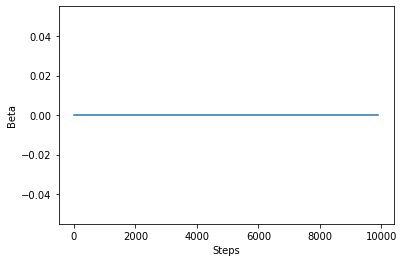

In [13]:
prep.utils = PrepUtils(prep.args, prep.paths.STORAGE_PATH)

In [ ]:
history = prep.model.model.fit(
    prep.dataloader.train_dataset,
    validation_data = prep.dataloader.valid_dataset,
    epochs = 10000,
    steps_per_epoch = 20,
    validation_steps = 1,
    callbacks = [prep.utils.checkpoint_callback, prep.utils.step_logger]
)

Epoch 1/10000
